In [13]:
import json
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [14]:
# Step 1: Save the dataset as a JSON file
data = [
    {"id": 1, "Height": 5, "Age": 45, "Weight": 77},
    {"id": 2, "Height": 5.11, "Age": 26, "Weight": 47},
    {"id": 3, "Height": 5.6, "Age": 30, "Weight": 55},
    {"id": 4, "Height": 5.9, "Age": 34, "Weight": 59},
    {"id": 5, "Height": 4.8, "Age": 40, "Weight": 72},
    {"id": 6, "Height": 5.8, "Age": 36, "Weight": 60},
    {"id": 7, "Height": 5.3, "Age": 19, "Weight": 40},
    {"id": 8, "Height": 5.8, "Age": 28, "Weight": 60},
    {"id": 9, "Height": 5.5, "Age": 23, "Weight": 45},
    {"id": 10, "Height": 5.6, "Age": 32, "Weight": 58},
]

In [15]:
with open("data.json", "w") as file:
    json.dump(data, file)

# Step 2: Load the JSON data
with open("data.json", "r") as file:
    loaded_data = json.load(file)

In [16]:
# Extract features (Height, Age, Weight) and create dummy target labels
X = np.array([[d["Height"], d["Age"], d["Weight"]] for d in loaded_data])
y = np.array([d["id"] for d in loaded_data])  # Using `id` as a dummy label

In [17]:
# Step 3: Train a KNN model
knn = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
  # 3 nearest neighbors
knn.fit(X, y)

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

In [18]:
# Step 4: Predict for a new data point
new_point = [5.7, 25, 55]  # Example query point (Height, Age, Weight)
prediction = knn.predict([new_point])
neighbors = knn.kneighbors([new_point], n_neighbors=3, return_distance=True)

In [19]:
print(f"Predicted nearest neighbor ID: {prediction[0]}")
print("Distances to Neighbors and IDs:")
for dist, neighbor_id in zip(neighbors[0][0], neighbors[1][0]):
    print(f"Distance: {dist:.2f}, ID: {y[neighbor_id]}")


Predicted nearest neighbor ID: 2
Distances to Neighbors and IDs:
Distance: 5.10, ID: 3
Distance: 8.10, ID: 8
Distance: 9.59, ID: 2


In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

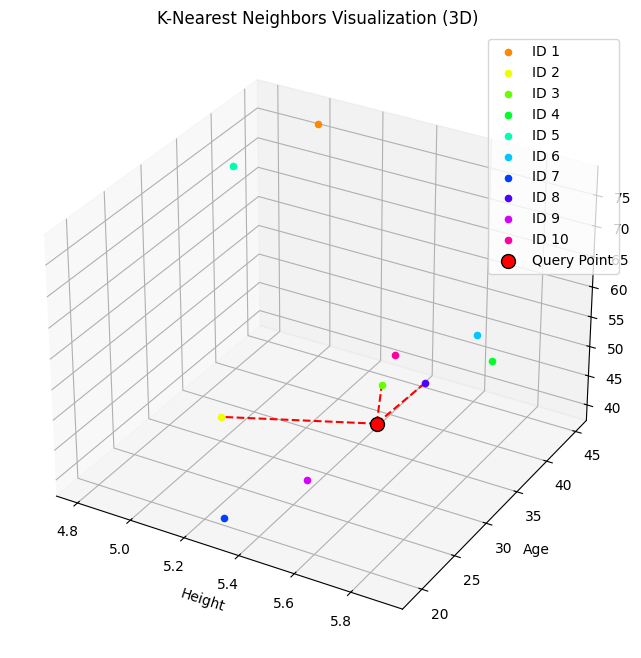

In [21]:
# Step 5: Visualization

# Create a 3D plot of Height, Age, and Weight
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the dataset
colors = sns.color_palette("hsv", len(data))
for i, point in enumerate(X):
    ax.scatter(point[0], point[1], point[2], color=colors[i], label=f"ID {y[i]}" if i < 10 else None)

# Highlight the query point
ax.scatter(new_point[0], new_point[1], new_point[2], color='red', s=100, label="Query Point", edgecolor='k')

# Highlight the nearest neighbors
for neighbor_idx in neighbors[1][0]:
    neighbor_point = X[neighbor_idx]
    ax.plot([new_point[0], neighbor_point[0]],
            [new_point[1], neighbor_point[1]],
            [new_point[2], neighbor_point[2]], 'r--')

# Label the axes
ax.set_xlabel("Height")
ax.set_ylabel("Age")
ax.set_zlabel("Weight")
ax.set_title("K-Nearest Neighbors Visualization (3D)")
plt.legend()
plt.show()

Predicted Weight for the query point (Height=5.7, Age=25): 50.67


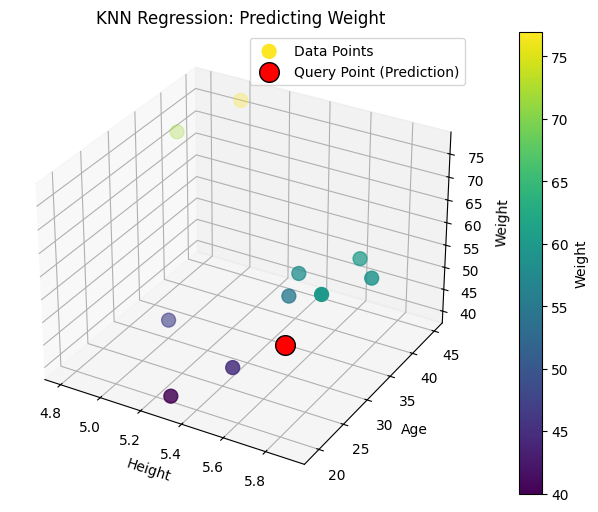

In [22]:
import json
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Step 1: Save the dataset as a JSON file
data = [
    {"id": 1, "Height": 5, "Age": 45, "Weight": 77},
    {"id": 2, "Height": 5.11, "Age": 26, "Weight": 47},
    {"id": 3, "Height": 5.6, "Age": 30, "Weight": 55},
    {"id": 4, "Height": 5.9, "Age": 34, "Weight": 59},
    {"id": 5, "Height": 4.8, "Age": 40, "Weight": 72},
    {"id": 6, "Height": 5.8, "Age": 36, "Weight": 60},
    {"id": 7, "Height": 5.3, "Age": 19, "Weight": 40},
    {"id": 8, "Height": 5.8, "Age": 28, "Weight": 60},
    {"id": 9, "Height": 5.5, "Age": 23, "Weight": 45},
    {"id": 10, "Height": 5.6, "Age": 32, "Weight": 58},
]

with open("data.json", "w") as file:
    json.dump(data, file)

# Step 2: Load the JSON data
with open("data.json", "r") as file:
    loaded_data = json.load(file)

# Extract features (Height, Age) and target (Weight)
X = np.array([[d["Height"], d["Age"]] for d in loaded_data])
y = np.array([d["Weight"] for d in loaded_data])

# Step 3: Train a KNN regression model
knn_regressor = KNeighborsRegressor(n_neighbors=3)  # 3 nearest neighbors
knn_regressor.fit(X, y)

# Step 4: Predict for a new data point
new_point = [5.7, 25]  # Example query point (Height, Age)
predicted_weight = knn_regressor.predict([new_point])

print(f"Predicted Weight for the query point (Height={new_point[0]}, Age={new_point[1]}): {predicted_weight[0]:.2f}")

# Step 5: Visualization

# Scatter plot of Height vs Age colored by Weight
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the original data points
scatter = ax.scatter(X[:, 0], X[:, 1], y, c=y, cmap="viridis", s=100, label="Data Points")
fig.colorbar(scatter, ax=ax, label="Weight")

# Plot the query point
ax.scatter(new_point[0], new_point[1], predicted_weight, color='red', s=200, label="Query Point (Prediction)", edgecolor='k')

# Label the axes
ax.set_xlabel("Height")
ax.set_ylabel("Age")
ax.set_zlabel("Weight")
ax.set_title("KNN Regression: Predicting Weight")
ax.legend()
plt.show()
